# Estimaciones de máximos exponentes de Lyapunov para series de positividad de examenes PCR.

In [2]:
#Se utilizará en principio los metodos otorgados por las librerias nolitsa y nolds, sin embargo, esto debe ser modificado.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds
from nolitsa import lyapunov,dimension,delay,noise

In [4]:
#Datos sacados de https://github.com/owid/covid-19-data/tree/master/public/data

In [5]:
#Funcion util para encontrar minimos locales.
%matplotlib inline
def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

# Importamos la data.

In [6]:
#Data nueva.
#https://ourworldindata.org/coronavirus-source-data
data = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\owid-covid-data-10-01.csv')
df =pd.DataFrame(data)

#Comparando ciudades, RM, Nueva York.

#Comparando Paises.

#Francia.
Francedata=df.loc[df['location']=='France']
Francets=np.array(Francedata.positive_rate).astype(float)
Francets=Francets[140:-6]

#Japan
Japandata=df.loc[df['location']=='Japan']
Japants=np.array(Japandata.positive_rate).astype(float)
Japants=Japants[21:-2]

#Mxico
Mexicodata=df.loc[df['location']=='Mexico']
Mexicots=np.array(Mexicodata.positive_rate).astype(float)
Mexicots=Mexicots[6:-3]

#Republica Dominicana.
DRdata=Francedata=df.loc[df['location']=='Dominican Republic']
DRts=np.array(DRdata.positive_rate).astype(float)
DRts=DRts[24:-4]

#Data old para Alemania y USts, 11-11-2020.
dataold = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\owid-covid-data.csv')
df =pd.DataFrame(dataold)

#Alemania
Alemaniadata=df.loc[df['location']=='Germany']
Alemaniats=np.array(Alemaniadata.positive_rate).astype(float)
Alemaniats=Alemaniats[75:-10]

#Estados Unidos
USdata=df.loc[df['location']=='United States']
USts=np.array(USdata.positive_rate).astype(float)
USts=USts[68:-6]

#Chile Actualizado
datach = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\Datos-COVID19-master-10-01\Datos-COVID19-master\output\producto49\Positividad_Diaria_Media_T.csv')
df=pd.DataFrame(datach)
chdata=np.array(df.positividad).astype(float)
Chilets=chdata



#Ciudades, RM, Nueva York.

#Nueva York.
#https://github.com/nychealth/coronavirus-data/blob/master/latest/now-tests.csv
datany = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\coronavirus-data-master-NY-10-01\coronavirus-data-master\trends\tests.csv')
df=pd.DataFrame(datany)
NYdata=np.array(df.PERCENT_POSITIVE).astype(float)
NYts=NYdata



datarm = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\Datos-COVID19-master-10-01\Datos-COVID19-master\output\producto55\Positividad_por_region.csv')
df=pd.DataFrame(datarm)
rmdata=df.loc[df['Region']=='Metropolitana']
rmdata=np.array(rmdata.positividad).astype(float)
RMts=rmdata
RMts=RMts[6:]
#Solo sirve la de Chilets, Alemaniats, France, Mexicots, Japants, DRts (republica dominicana), USts.

# Estimación de tiempos óptimos de retardo.

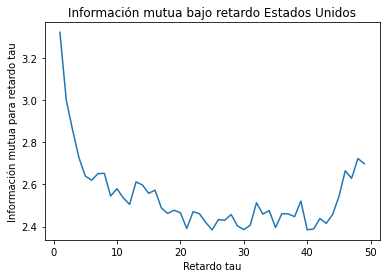

Los mínimos locales se alcanzan para tau=[ 6  9 12 15 18 21 25 27 30 33 35 38 40 43 47]


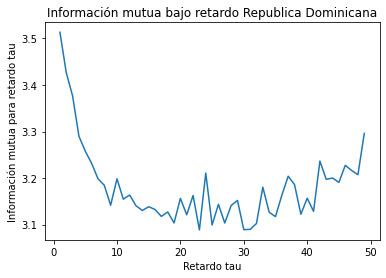

Los mínimos locales se alcanzan para tau=[ 9 11 14 17 19 21 23 25 27 30 35 39 41 43 45 48]


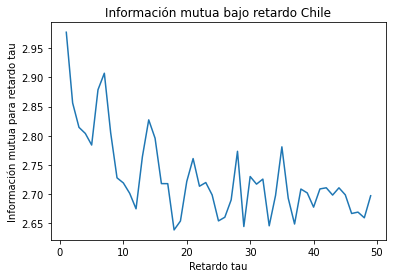

Los mínimos locales se alcanzan para tau=[ 5 12 18 22 25 29 31 33 37 40 43 46 48]


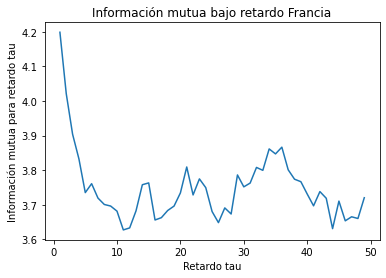

Los mínimos locales se alcanzan para tau=[ 5 11 16 22 26 28 30 33 35 41 44 46 48]


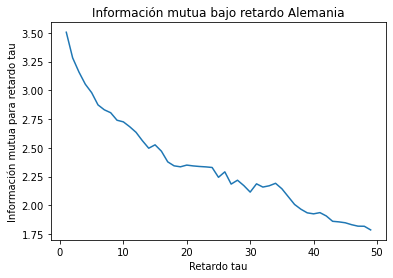

Los mínimos locales se alcanzan para tau=[14 19 25 27 30 32 40]


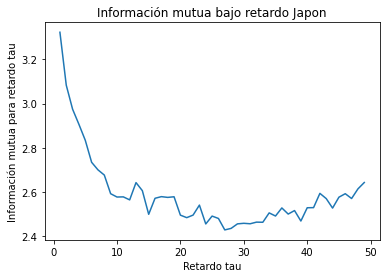

Los mínimos locales se alcanzan para tau=[10 12 15 18 21 24 27 31 33 35 37 39 44 47]


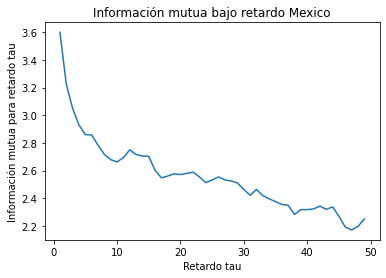

Los mínimos locales se alcanzan para tau=[10 17 20 24 31 38 40 43 47]


In [7]:
Time_series=[USts/max(USts), DRts/max(DRts), Chilets/max(Chilets), Francets/max(Francets), Alemaniats/max(Alemaniats), Japants/max(Japants), Mexicots/max(Mexicots)]
for i in range(len(Time_series)):
    X=Time_series[i]/max(Time_series[i])
    #Calculo de la información mutua entre X_t, X_(t+tau)
    time_delay_mi=np.zeros(49)
    for tau in range(1,50):
        td=delay.mi(X[:-tau],X[tau:])
        time_delay_mi[tau-1]=td
    if i==0:
        plt.title('Información mutua bajo retardo Estados Unidos')
    if i==1:
        plt.title('Información mutua bajo retardo Republica Dominicana')
    if i==2:
        plt.title('Información mutua bajo retardo Chile')
    if i==3:
        plt.title('Información mutua bajo retardo Francia')
    if i==4:
        plt.title('Información mutua bajo retardo Alemania')
    if i==5:
        plt.title('Información mutua bajo retardo Japon')
    if i==6:
        plt.title('Información mutua bajo retardo Mexico')
    plt.plot(range(1,50),time_delay_mi)
    plt.xlabel('Retardo tau')
    plt.ylabel('Información mutua para retardo tau')
    plt.show()
    print('Los mínimos locales se alcanzan para tau='+ str(localmin(time_delay_mi)+1))

In [8]:
Tau=[6,5,4,6,14,7,4]

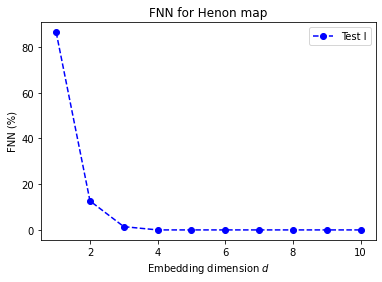

In [9]:
#Ejemplo de como usarlo
import numpy as np
from nolitsa import lyapunov,dimension,delay,noise
X=Time_series[2]
dim = np.arange(1, 10 + 1)
f1, f2, f3 = dimension.fnn(X, tau=4, dim=dim, window=10, metric='cityblock')

plt.title(r'FNN for Henon map')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
"""plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')"""
plt.legend()

plt.show()

# Estimación dimensión de inmersión.

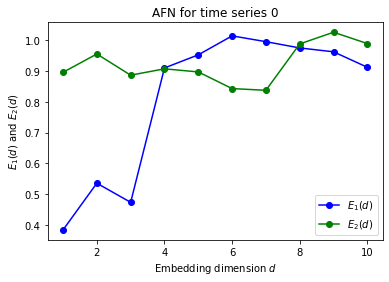

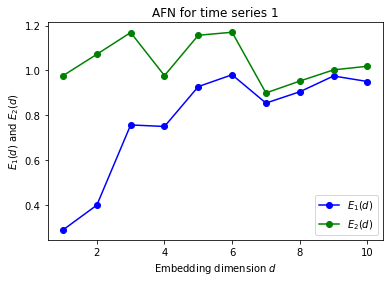

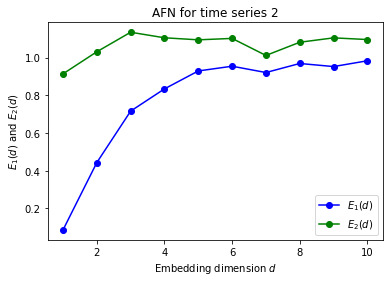

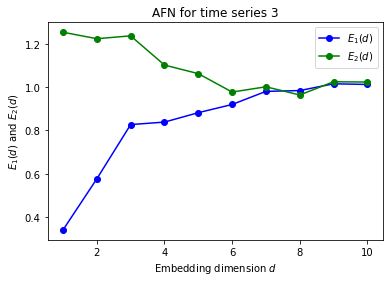

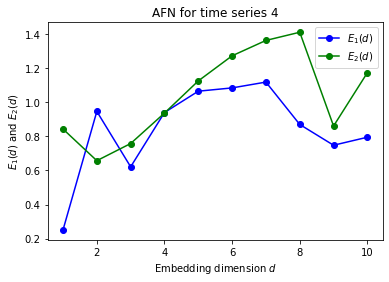

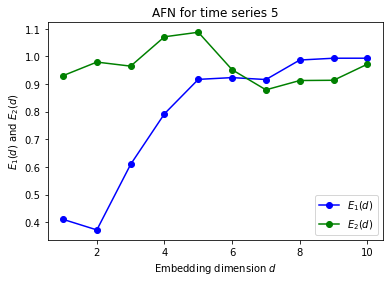

In [10]:
#Tira un error para la serie de Londres revisar porque.
for i in range(len(Time_series)-1):
    X=Time_series[i]
    # AFN algorithm.
    dim = np.arange(1,10 + 2)
    E, Es = dimension.afn(X, tau=Tau[i], dim=dim, window=30)
    E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
    plt.title(r'AFN for time series '+str(i))
    plt.xlabel(r'Embedding dimension $d$')
    plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
    plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
    plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
    plt.legend()
    plt.show()

In [11]:
Embdim=[4,5,5,3,2,5,4]

# Realizamos la estimación.

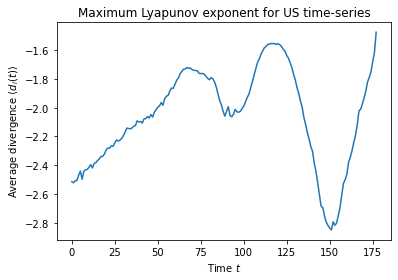

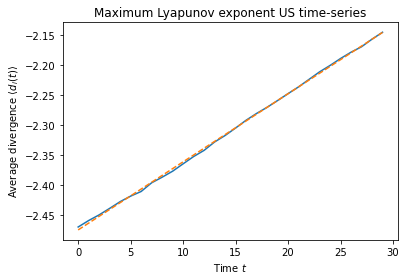

Linear fitting coeficient=0.011385770168523561


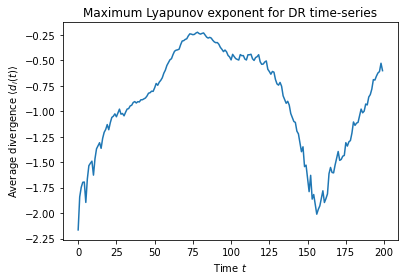

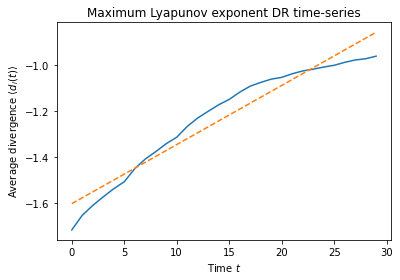

Linear fitting coeficient=0.02566119874107509


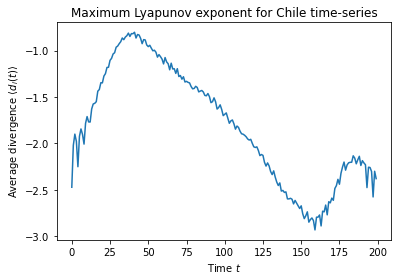

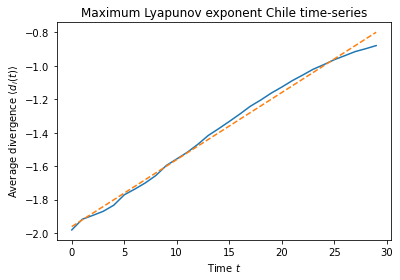

Linear fitting coeficient=0.040087975015044006


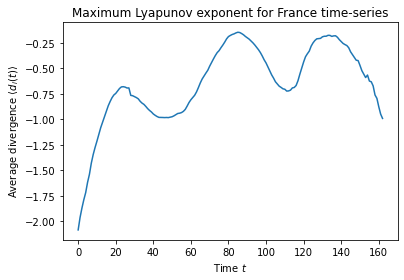

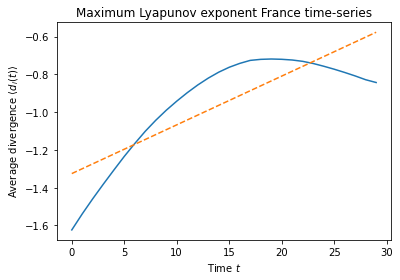

Linear fitting coeficient=0.02581283152998628


In [12]:
MLEs_nolitsa=np.zeros(7)
Ciudades=['US', 'DR', 'Chile', 'France', 'Alemania', 'Japan', 'Mexico']
for i in range(len(Time_series)-3):
    X=Time_series[i]
    LEs=lyapunov.mle_embed(X, dim=[Embdim[i]], tau=Tau[i], window=30, maxt=200)[0]
    plt.plot(range(len(LEs)),LEs)
    plt.title('Maximum Lyapunov exponent for '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.show()

    sma=noise.sma(LEs[:40], hwin=5)
    plt.title('Maximum Lyapunov exponent '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.plot(np.arange(len(sma)),sma)
    p = np.polyfit(np.arange(len(sma)), sma,deg=1)
    xaxis = np.arange(len(sma))
    yaxis = p[1] + p[0] * xaxis
    plt.plot(xaxis, yaxis, '--')
    plt.show()
    print('Linear fitting coeficient='+str(p[0]))
    MLEs_nolitsa[i]=p[0]

In [13]:
#Nolds
MLEs_nolds=np.zeros(7)
for i in range(len(Time_series)):
    X=Time_series[i]
    MLEs_nolds[i]=nolds.lyap_r(X, emb_dim=Embdim[i], lag=Tau[i], min_tsep=20,tau=1, 
                     min_neighbors=30, trajectory_len=30, fit='RANSAC', 
                     debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)

In [14]:
print("Valor obtenido de MLE con nolitsa: "+str(MLEs_nolitsa*365))
print("Valor obtenido de MLE con nolds: "+str(MLEs_nolds*365))
#En bit/año

Valor obtenido de MLE con nolitsa: [ 4.15580611  9.36633754 14.63211088  9.42168351  0.          0.
  0.        ]
Valor obtenido de MLE con nolds: [ 6.27335849 11.0919258   9.68552152 17.97626286  9.3910779   7.78114943
 22.8002781 ]


In [15]:
(0.7-0.4)/0.7

0.4285714285714285

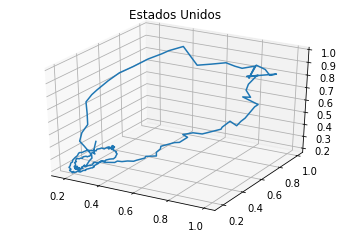

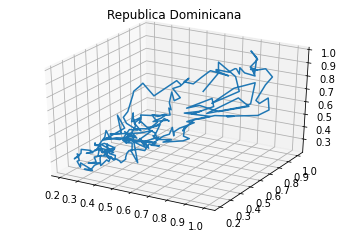

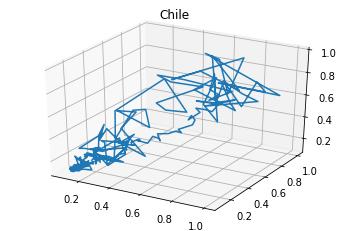

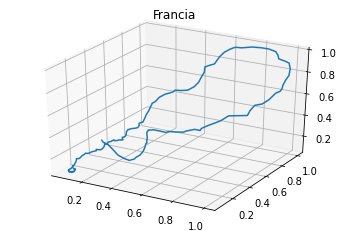

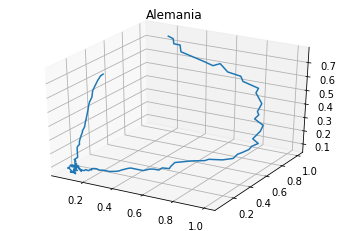

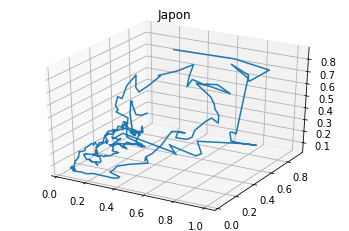

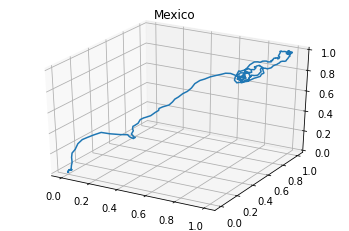

In [16]:
#[USts, DRts, Chilets, Francets, Alemaniats, Japants, Mexicots]
Pais=['Estados Unidos','Republica Dominicana','Chile','Francia','Alemania','Japon','Mexico']
for i in range(len(Time_series)):
    X=Time_series[i]
    tau_to_use=Tau[i]
    data=X
    data_lag0 = data[:-2* tau_to_use].flatten()
    data_lag1 = np.roll(data, -tau_to_use)[:-2* tau_to_use].flatten()
    data_lag2 = np.roll(data, -2 * tau_to_use)[:-2* tau_to_use].flatten()

    # Plot time delay embedding
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(data_lag0, data_lag1, data_lag2)
    plt.title(Pais[i])
    plt.show()

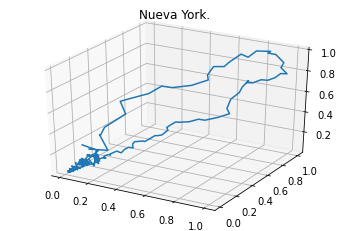

In [17]:
#Nueva York
tau_to_use=3
data=NYts/max(NYts)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Nueva York.')
plt.show()

In [18]:
Time_series=[RMts,NYts]

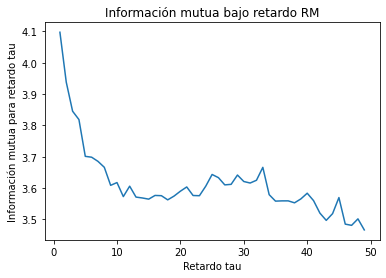

Los mínimos locales se alcanzan para tau=[ 9 11 15 18 23 27 31 35 38 43 47]


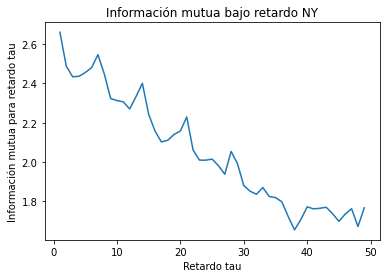

Los mínimos locales se alcanzan para tau=[ 3 12 17 24 27 32 38 41 45 48]


In [19]:
for i in range(len(Time_series)):
    X=Time_series[i]/max(Time_series[i])
    #Calculo de la información mutua entre X_t, X_(t+tau)
    time_delay_mi=np.zeros(49)
    for tau in range(1,50):
        td=delay.mi(X[:-tau],X[tau:])
        time_delay_mi[tau-1]=td
    if i==0:
        plt.title('Información mutua bajo retardo RM')
    if i==1:
        plt.title('Información mutua bajo retardo NY')
    plt.plot(range(1,50),time_delay_mi)
    plt.xlabel('Retardo tau')
    plt.ylabel('Información mutua para retardo tau')
    plt.show()
    print('Los mínimos locales se alcanzan para tau='+ str(localmin(time_delay_mi)+1))

In [20]:
Tau=[9,3]

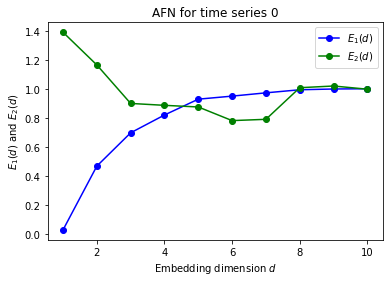

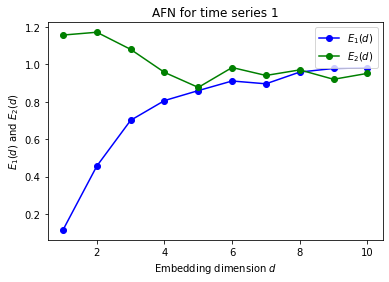

In [21]:
#Tira un error para la serie de Londres revisar porque.
for i in range(len(Time_series)):
    X=Time_series[i]
    # AFN algorithm.
    dim = np.arange(1,10 + 2)
    E, Es = dimension.afn(X, tau=Tau[i], dim=dim, window=20)
    E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
    plt.title(r'AFN for time series '+str(i))
    plt.xlabel(r'Embedding dimension $d$')
    plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
    plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
    plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
    plt.legend()
    plt.show()

In [22]:
Embdim=[5,5]

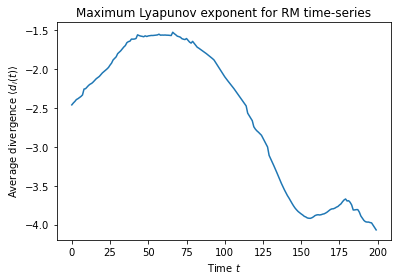

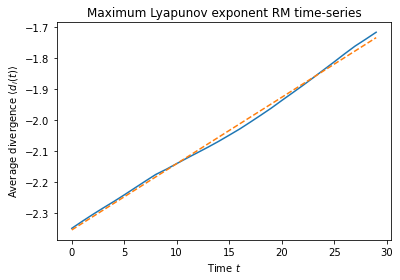

Linear fitting coeficient=0.021450557359363166


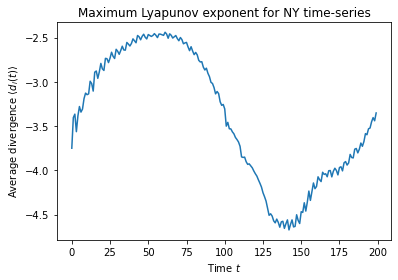

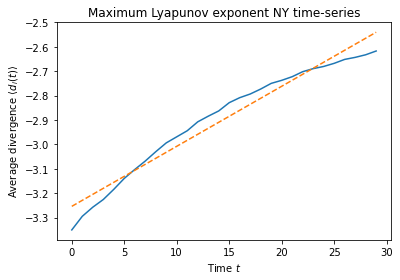

Linear fitting coeficient=0.02462185486222968


In [23]:
MLEs_nolitsa=np.zeros(2)
Ciudades=['RM','NY']
for i in range(len(Time_series)):
    X=Time_series[i]
    LEs=lyapunov.mle_embed(X, dim=[Embdim[i]], tau=Tau[i], window=30, maxt=200)[0]
    plt.plot(range(len(LEs)),LEs)
    plt.title('Maximum Lyapunov exponent for '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.show()

    sma=noise.sma(LEs[:40], hwin=5)
    plt.title('Maximum Lyapunov exponent '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.plot(np.arange(len(sma)),sma)
    p = np.polyfit(np.arange(len(sma)), sma,deg=1)
    xaxis = np.arange(len(sma))
    yaxis = p[1] + p[0] * xaxis
    plt.plot(xaxis, yaxis, '--')
    plt.show()
    print('Linear fitting coeficient='+str(p[0]))
    MLEs_nolitsa[i]=p[0]

In [24]:
#Nolds
MLEs_nolds=np.zeros(2)
for i in range(len(Time_series)):
    X=Time_series[i]
    MLEs_nolds[i]=nolds.lyap_r(X, emb_dim=Embdim[i], lag=Tau[i], min_tsep=20,tau=1, 
                     min_neighbors=30, trajectory_len=30, fit='RANSAC', 
                     debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)

In [25]:
print("Valor obtenido de MLE con nolitsa: "+str(MLEs_nolitsa*365))
print("Valor obtenido de MLE con nolds: "+str(MLEs_nolds*365))
#En bit/año

Valor obtenido de MLE con nolitsa: [7.82945344 8.98697702]
Valor obtenido de MLE con nolds: [-1.95454211 11.24459464]
